In [32]:
import os.path as osp
from util.experiment_setup import load_log
from util.files import find_files_in_folder
from matplotlib import pyplot as plt
import numpy as np
import yaml
import matplotlib as mpl
import palettable

In [33]:
train1 = "../models/bg_transform/mod3_no_reg_scale0.1-3.5_r3"
train2 = "../models/mod3_kernel_size/ks5"
log1 = load_log(osp.join(osp.split(train1)[0],"logs",osp.split(train1)[1]+".yaml"))
log2 = load_log(osp.join(osp.split(train2)[0],"logs",osp.split(train2)[1]+".yaml"))

In [34]:
all_log_files = find_files_in_folder("../models/areadne_submission/logs", ".yaml")

In [35]:
all_log_files=np.array(all_log_files)[np.array(["_ks3" in f or "ks5" in f for f in all_log_files])]

In [36]:
# all_log_files = ["../models/areadne_submission/logs/stride_large_ks4.yaml",
#                  "../models/areadne_submission/logs/spd_large_ks2_nopad.yaml",
#                  "../models/areadne_submission/logs/pool_large.yaml",
#                  "../models/areadne_submission/logs/stride_large.yaml"]

In [37]:
logs = [load_log(f) for f in all_log_files]

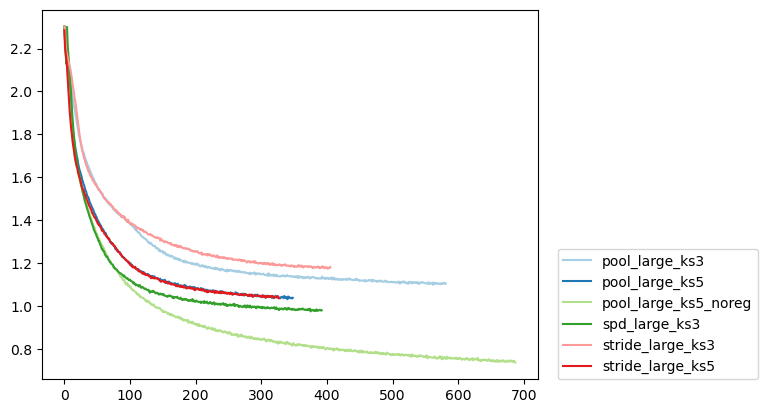

In [38]:
for log in logs:
    plt.plot(log["train_loss"])#, c="grey")
# plt.plot(log1["train_loss"], c=(0.1,0.1,0.8))
# plt.plot(log2["train_loss"], c=(0.1,0.8,0.1))
legend = [osp.split(model_path)[1][:-5] for model_path in all_log_files]
# legend.append(osp.split(train1)[1])
# legend.append(osp.split(train2)[1])
# plt.ylim(0.7,2.5)
plt.legend(legend, loc=(1.04, 0))
plt.show()

In [39]:
mpl.rcParams['axes.prop_cycle'] = plt.cycler("color", palettable.colorbrewer.qualitative.Paired_10.mpl_colors)

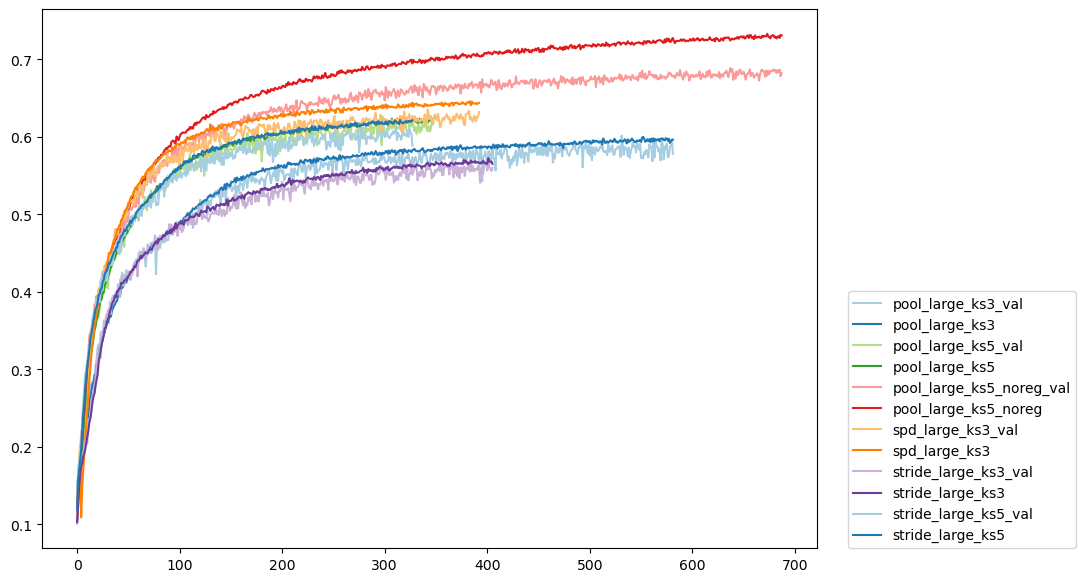

In [40]:
plt.figure(figsize=(10,7))
for log in logs:
    plt.plot(np.array(log["val_acc"])/100)#, c="grey")
    plt.plot(log["train_acc"])#, c="grey")
# plt.plot(np.array(log1["val_acc"])/100)
# plt.plot(log1["train_acc"])
# plt.plot(np.array(log2["val_acc"])/100)
# plt.plot(log2["train_acc"])
# legend=[osp.split(train1)[1], osp.split(train2)[1]]
new_legend=[]
for entry in legend:
    new_legend.extend([entry+"_val", entry])
plt.legend(new_legend, loc=(1.04, 0))
plt.show()

In [41]:

# legend=[osp.split(train1)[1], osp.split(train2)[1]]
# plt.legend(legend, loc=(1.04, 0))
# plt.show()